<a href="https://colab.research.google.com/github/SandyLlapa/ML-LinearReg/blob/main/SandyLlapa_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4

## Introduction

**What is the goal of this lab?**

This lab goes over the steps to build a linear regression model with both categorical and numerical features, along with the statistical tests that should be run to help better understand the data for the model.

**Context**

Linear regression is one of the most fundamental and widely used tools in data analysis. Its simplicity makes it an ideal starting point for understanding the basics of predictive modeling. By establishing a relationship between variables, linear regression allows us to make informed predictions and gain insights into data trends. Mastering linear regression is essential for developing the skills needed to analyze and interpret data effectively, laying the groundwork for more advanced analytical techniques.


### Data

This lab uses the energy efficieny data set 💡. It contains data about the energy efficiency of shapes and specifications of buildings.

For more information you can check out the original research paper that introduced this data set [Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools](https://www.sciencedirect.com/science/article/pii/S037877881200151X).

In [ ]:
# Install package to download data sets from UCI ML Repo
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

In [ ]:
# Get the data set
energy = fetch_ucirepo(name="Energy Efficiency")

In [ ]:
# Get raw data in a pandas.DataFrame format
energy_df = energy.data.original

In [ ]:
# Citation
print("Citation:\n", energy.metadata.additional_info.citation)

Citation:
 None


> _Tsanas, Athanasios and Xifara, Angeliki. (2012). Energy Efficiency.     
UCI Machine Learning Repository. https://doi.org/10.24432/C51307._

In [ ]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print(energy.metadata.repository_url)

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/242/energy+efficiency


## Problem Statement

**Why could it be beneficial to predict the heating or cooling amount of energy for a building? Explain 2 possible reasons or use cases.**

>

Optimizing energy usage is one of the key reasons for predicting the heating or cooling energy requirements of a building. By accurately predicting energy needs, the thermostat can be adjusted to reduce energy consumption. Optimizing energy usage also helps with cost savings. By reducing energy use, money can be saved on utility bills.


**Explain what each the following assumptions of linear regression are and how you could validate them:**
- **Homoscedasticity**
- **No Multicollinearity**
- **No Autocorrelation**

>
Homoscedasticity: This refers to a situation in which the error term is constant across all values of the independent variable. To validate homoscedasticity, you can plot the residuals against the predicted values; the data points should appear randomly scattered.

No Multicollinearity: This refers to not having two or more independent variables that are highly correlated. To validate multicollinearity, check the correlation coefficient values. High correlation values indicate potential multicollinearity.

No Autocorrelation: This means that the residuals of a regression model are independent of each other. To validate autocorrelation, you can plot the residuals over time to determine if there is any pattern.




## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection

Print out the following details about the data:
- The first 5 rows of the data set
- Number of rows and columns
- Data type of each column
- Number of null values (or not-null values) in each column
- General statistics of each numeric column (min, max, mean, standard deviation)

---

**Hints**

- [`pandas.DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`pandas.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:

print("First 5 rows: ")
print(energy_df.head())

print("\nNumber of rows and columns: ")
print(energy_df.shape)

print("\nData type of each column: ")
print(energy_df.dtypes)

print("\nNumber of null values: ")
print(energy_df.isnull().sum())

print("\nGeneral Statistic: ")
print(energy_df.isnull().sum())



First 5 rows: 
   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

  orientation  glazing_area glazing_area_distribution  heating_load  \
0       North           0.0                No glazing         15.55   
1        East           0.0                No glazing         15.55   
2       South           0.0                No glazing         15.55   
3        West           0.0                No glazing         15.55   
4       North           0.0                No glazing         20.84   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3         2

### Data cleaning

The default column names are not very descriptive. Rename the columns according to this mapping of names adapted from the data set description.

```python
{
    'X1': 'relative_compactness',
    'X2': 'surface_area',
    'X3': 'wall_area',
    'X4': 'roof_area',
    'X5': 'overall_height',
    'X6': 'orientation',
    'X7': 'glazing_area',
    'X8': 'glazing_area_distribution',
    'Y1': 'heating_load',
    'Y2': 'cooling_load',
}
```

---
**Hints**
- [`pandas.DataFrame.rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

In [ ]:

energy_df = energy_df.rename(columns=
    {
      'X1': 'relative_compactness',
      'X2': 'surface_area',
      'X3': 'wall_area',
      'X4': 'roof_area',
      'X5': 'overall_height',
      'X6': 'orientation',
      'X7': 'glazing_area',
      'X8': 'glazing_area_distribution',
      'Y1': 'heating_load',
      'Y2': 'cooling_load',
    }

    )

The variables `"orientation"` and `"glazing_area_distribution"` are categorical variables which currently have numeric indicies. Convert this index values into more descriptive names using this mapping.


```python
{
    0: 'No glazing',
    1: 'Uniformly distributed',
    2: 'North',
    3: 'East',
    4: 'South',
    5: 'West'
}
```

---
**Hints**

- [`pandas.Series.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html)

In [ ]:

energy_df['orientation'] = energy_df['orientation'].replace({
    0: 'No glazing',
    1: 'Uniformly distributed',
    2: 'North',
    3: 'East',
    4: 'South',
    5: 'West'
})

energy_df['glazing_area_distribution'] = energy_df['glazing_area_distribution'].replace({
    0: 'No glazing',
    1: 'Uniformly distributed',
    2: 'North',
    3: 'East',
    4: 'South',
    5: 'West'
})

### Data Visualization and Statistics

Our model will attempt to predict `"heating_load"` with 2 categorical variables `"orientation"` & `"glazing_area_distribution"`, and 2 numeric variables `"surface_area"` & `"wall_area"`.

1. First, we will create graphs to **visualize** the relationship between each of these variables and the heating load.

2. Second, we will do some **statistical tests** to determine if each individual variable has a statistically significant relationship with heating load.

These steps will help us determine which features to use in the model.


#### Visualizations

Create plots to visualize the relationship of each of the four variables with heating load. For each graph the Y-axis should be heating load `y="heating_load"`, and the X-axis should be the other variable. Create box plots for the categorical variables and scatter plots for the numeric variables.


---
**Hints**
- [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)



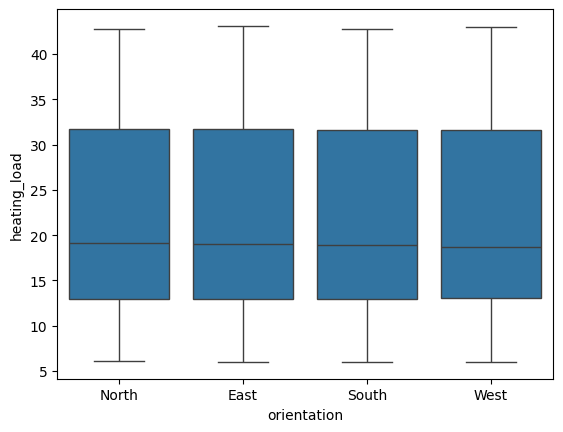

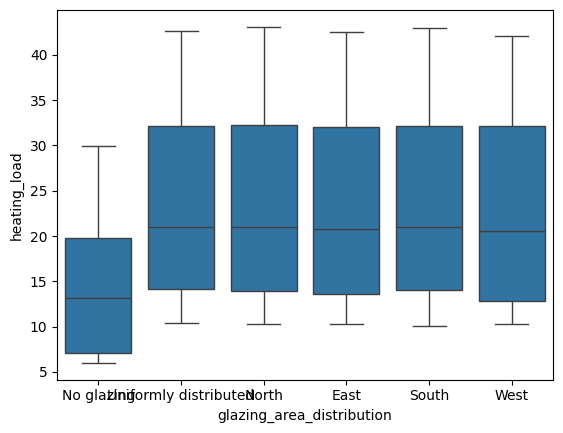

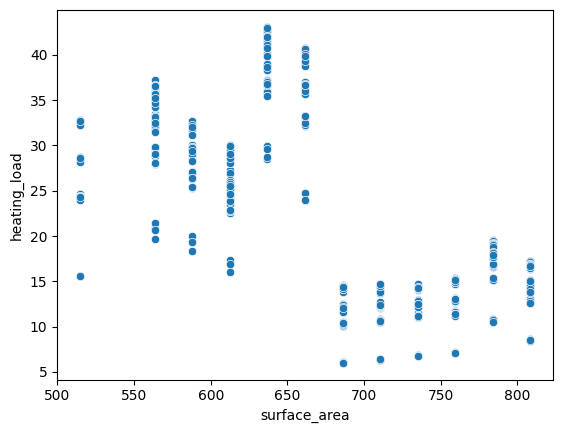

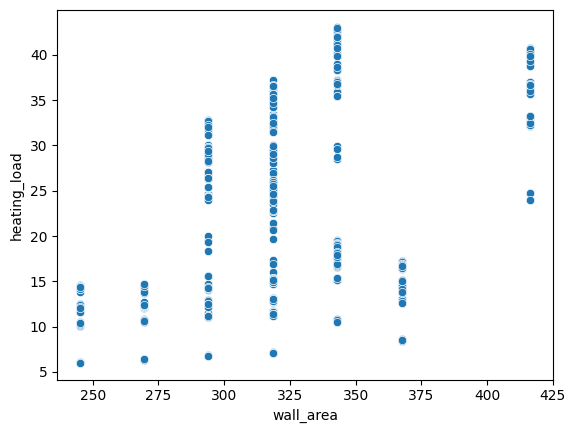

In [ ]:

# orientation vs heating_load
plt.figure()
sns.boxplot(x='orientation', y='heating_load', data=energy_df)
plt.show()

# glazing_area_distribution vs heating_load
plt.figure()
sns.boxplot(x='glazing_area_distribution', y='heating_load', data=energy_df)
plt.show()

 # surface_area
plt.figure()
sns.scatterplot(x='surface_area', y='heating_load', data=energy_df)
plt.show()

#wall_area
plt.figure()
sns.scatterplot(x='wall_area', y='heating_load', data=energy_df)
plt.show()





#### Statistics

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Run statistical tests to analyze the relationship of each of the four variables with heating load. Each test will result in a p-value to determine if the relationship is statistically significant, which is an indiciation that would be a useful feature for the model. Run *ANOVA for the categorical* variables and *OLS for the numeric variables*. Print out F-statistic and p-value of each test.

---
**Hints**
- [`statsmodels.formula.api.ols()`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html)
- [`statsmodels.stats.anova.anova_lm()`](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)


In [ ]:
# Answer with code here

modelOrientation = sm.formula.ols('heating_load ~ C(orientation)',data=energy_df).fit()
anovaOrientation = sm.stats.anova_lm(modelOrientation)
print("F-statistic & P-value of orientation: \n")
print(anovaOrientation[['F', 'PR(>F)']])

modelGlazing = sm.formula.ols('heating_load ~ C(glazing_area_distribution)',data=energy_df).fit()
anovaGlazing = sm.stats.anova_lm(modelGlazing)
print("F-statistic & P-value of glazing area distribution: \n")
print(anovaGlazing[['F', 'PR(>F)']])

modelSA = sm.formula.ols('heating_load ~ surface_area',data=energy_df).fit()
print("Surface Area: \n")
print(f"F-statistic: {modelSA.fvalue:.4f}, p-value: {modelSA.f_pvalue:.4f}")

modelWA = sm.formula.ols('heating_load ~ wall_area',data=energy_df).fit()
print("Wall Area: \n")
print(f"F-statistic: {modelWA.fvalue:.4f}, p-value: {modelWA.f_pvalue:.4f}")





F-statistic & P-value of orientation: 

                       F    PR(>F)
C(orientation)  0.005436  0.999448
Residual             NaN       NaN
F-statistic & P-value of glazing area distribution: 

                                     F    PR(>F)
C(glazing_area_distribution)  6.740745  0.000004
Residual                           NaN       NaN
Surface Area: 

F-statistic: 585.2613, p-value: 0.0000
Wall Area: 

F-statistic: 200.7277, p-value: 0.0000


## Models

Create a linear regression model using only the variables that showed a significant effect on heating load based on the p-values calculated above. Compare the results of doing this with the Statsmodels vs. Scikit-Learn.

#### Statsmodels

Create an [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) linear regression model using the Statsmodels package to predict heating load using only the signifant variables from the EDA analysis. Then print out the model summary.

---
**Hints**

- [`statsmodels.formula.api.ols()`]()
    - Use this to run the linear regression
- [`statsmodels.regression.linear_model.RegressionResults.summary()`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)
    - This is the type of object it returns. Run the `.summary()` method to print out the model summary.

In [ ]:
# Answer with code here
#glazing_area_distribution
#Surface area
#wall area

smModel = sm.formula.ols('heating_load ~ C(glazing_area_distribution) + surface_area + wall_area',data=energy_df).fit()
print(smModel.summary())


                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     532.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.62e-288
Time:                        16:29:04   Log-Likelihood:                -2183.0
No. Observations:                 768   AIC:                             4382.
Df Residuals:                     760   BIC:                             4419.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### Scikit-Learn

Create a linear regression model using Scikit Learn to predict heating load using only the signifant variables from the EDA analysis. Then print out the coefficients and intercept of the model.

---
**Hints**
- [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)
encoderGlazing = encoder.fit_transform(energy_df[['glazing_area_distribution']])

glazing = pd.DataFrame(encoderGlazing,columns=encoder.get_feature_names_out(['glazing_area_distribution']))
x = pd.concat([glazing, energy_df[['surface_area', 'wall_area']]], axis=1)
y = energy_df['heating_load']

model = LinearRegression()
model.fit(x, y)


print("Coefficients:", model.coef_)
print("Intercept (Scikit-Learn):", model.intercept_)


Coefficients: [-8.39500000e+00  2.52986111e-01  2.05208333e-01  3.44652778e-01
 -5.55555556e-04 -8.89931078e-02  1.40519232e-01]
Intercept (Scikit-Learn): 37.703495204319516


Calculate the predictions of both models on the training data set. Then calculate the mean absolute error (MAE) and root mean squared error (RMSE) of those predictions.

---
**Hints**

- [`statsmodels.base.model.Model.predict()`](https://www.statsmodels.org/stable/dev/generated/statsmodels.base.model.Model.html#statsmodels.base.model.Model)
- [`sklearn.linear_model.LinearRegression.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [`sklearn.metrics.mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- [`sklearn.metrics.mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import statsmodels.formula.api as sm
predict_x = model.predict(x)

mean = mean_absolute_error(y,predict_x)
sqrt= np.sqrt(mean_squared_error(y,predict_x))
model_stats = sm.ols('heating_load ~ C(glazing_area_distribution) + surface_area + wall_area', data=energy_df).fit()

print(f"Model - MAE: {mean}")
print(f"Model - RMSE: {sqrt}")

statPredict = model_stats.predict(energy_df[['glazing_area_distribution', 'surface_area', 'wall_area']])

statMean = mean_absolute_error(y, statPredict)
statSqrt = np.sqrt(mean_squared_error(y,statPredict))

print(f"Statsmodels Model - MAE: {statMean}")
print(f"Statsmodels Model - RMSE: {statSqrt}")

Model - MAE: 3.0129333243253718
Model - RMSE: 4.151521650398644
Statsmodels Model - MAE: 3.012933324325274
Statsmodels Model - RMSE: 4.151521650398643


## Conclusion

**Which variables should a statistically significant relationship with heating load in the statistical tests? Does that match what is visualized in the graphs?**

>

The variable Glazing Area Distribution has a p-value lower than 0.05, indicating that it has a statistically significant relationship with heating load. In its box plot, it can be seen that no-glazing has a significant impact on reducing the heating load.

The variable Surface Area has a p-value lower than 0.05, meaning that it is statistically significant. Its scatter plot shows that as the surface area decreases, the heating load also decreases.


The variable Wall Area has a p-value lower than 0.05, indicating a statistically significant relationship with heating load. In its scatter plot, it shows that as the wall area increases, the heating load also increases.



**Evaluate the $R^2$, $p-value$, and $F-statistic$ from the multivariable OLS linear regression model. Do these value indicate that the model is a good fit to the data? Why or why not?**


R-squared is 0.830, meaning that 83% of the variance in heating load is explained by the model. This high percentage suggests that the model is a good fit for the data. The overall p-value is very small, indicating that the model is statistically significant. The F-statistic value is fairly high, further suggesting that the model is statistically significant. In conclusion, the model is a good fit for the data.


**Evaluate the coefficients from both the Statsmodels OLS and Scikit Learn Linear Regression model. How similar are they? What are any differences?**

>

The coefficients from the statmodels OLS and Scikit learn linear regression model are very similar the differences are: [intercept: 0.0015],[No glazing: 0.001], [Glazing-area-distribution (North): 0.000], [Glazing-area-distribution (South): 0.0008], [Glazing-area-distribution (Uniformly Distributed): 0.0003], [Glazing-area-distribution (west): 0.0004],[Surface Area: 0.0001],[Wall Area: 0.0001],  

**Evaluate the mean absolute error (MAE) and root mean squared error (RMSE). Are those error values large or small values compared to the heating load variable we are trying to predict? Would you conclude the model is accurate? Why or why not?**

>

The MAE value of 3.0129 and the RMSE value of 4.15 indicate the average difference between the predicted and actual heating load values. While the difference is not too large, the model appears to be fairly accurate overall.
